In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests as rq
import json as js
from tweepy import OAuthHandler
from timeit import default_timer
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import time
import datetime
import tweepy


In [4]:
#Loading provided archive
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
#Querying Image Data
image_source = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = rq.get(image_source, auth=('user', 'pass'))
r.status_code

200

In [6]:
#Writing image predictions to TSV file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

#Reading TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#Creating a json.txt file for access keys from twitter
#This is to comply with Twitter's terms of use of their developer account
keys = open('keys_json.txt', 'r')
my_keys = js.load(keys)

In [8]:
import tweepy

#Querying each tweet

consumer_key = my_keys['consumer_key']
consumer_secret = my_keys['consumer_secret']
access_token = my_keys['access_token']
access_secret = my_keys['access_secret']

auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_secret
)

api = tweepy.API(auth, wait_on_rate_limit=True)

# The status of each tweet id
# Using one tweet ID as an example: Get the status text of one tweet ID
tweet = api.get_status(892420643555336193)
print(tweet.text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [9]:
#Side attraction: most recent public tweet on my twitter feed 😂

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Now is the time for Scots to escape the clutches of Westminster | Letters https://t.co/qNvWfVcJVn
THE GRAYSCALE PREMIUM:

Much can all be traced back to Grayscale BTC, crypto's first publicly-traded BTC fund.

The… https://t.co/XCkYDkpc1G
Allowing babies in the Commons would humanise it | Letters https://t.co/FsYCMrDxJr
MAPPING CONTAGION IN CRYPTO

Crypto has slowly bled trillions since November, wiping out one big player at a time.… https://t.co/z8ynV3Zgm3
RT @curiousnewton: @unusual_whales flow never lies, too profits. Pretty good day 🐳🐳🐳🐳🔥🔥🔥💯💯💯 $GME https://t.co/7aE72nUtJ7
A Belgian court found ten people guilty of providing assistance to the Islamist terrorist group that killed 130 peo… https://t.co/mnVouNW6d5
A record low of 38% of adults said they were extremely proud to be American, according to a Gallup survey.  https://t.co/9I4z0yeTxA
$HIMX 2022-09-16 C $8
Underlying: $7.525, % Diff: 6.31%

🗓️🐂🛍️⚡
Bid-Ask: $0.65 - $0.7
Interest: 72
Volume: 3,622
IV… https://t.co/3T45b6TAJm
Nat

In [10]:
#Getting the tweet ids from WeRateDogs tweet
tweet_ids = df.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [11]:
#Number of twitter ids

len(tweet_ids)

2356

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0

# dictionary to catch the errors
fails_dict = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as plato:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #Get the Tweet ID
        print(str(count) + ": " + str(tweet_id))
        try:
            # Get the status data for each of the tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            js.dump(tweet._json, plato)
            plato.write('\n')

            #errors that may occur
        except tweepy.TweepyException as error:
            print(str(count) + ": " + str(tweet_id) + '   This ID has an error', error.response.text)
            
            #Appending errors to dictionary "fails_dict"
            fails_dict[tweet_id] = error
      
end = time.time()
print(end - start)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
20: 888202515573088257   This ID has an error {"errors":[{"code":144,"message":"No status found with that ID."}]}
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 88492552174170931

Rate limit reached. Sleeping for: 641


901: 758740312047005698
902: 758474966123810816
903: 758467244762497024
904: 758405701903519748
905: 758355060040593408
906: 758099635764359168
907: 758041019896193024
908: 757741869644341248
909: 757729163776290825
910: 757725642876129280
911: 757611664640446465
912: 757597904299253760
913: 757596066325864448
914: 757400162377592832
915: 757393109802180609
916: 757354760399941633
917: 756998049151549440
918: 756939218950160384
919: 756651752796094464
920: 756526248105566208
921: 756303284449767430
922: 756288534030475264
923: 756275833623502848
924: 755955933503782912
925: 755206590534418437
926: 755110668769038337
927: 754874841593970688
928: 754856583969079297
929: 754747087846248448
930: 754482103782404096
931: 754449512966619136
932: 754120377874386944
933: 754011816964026368
933: 754011816964026368   This ID has an error {"errors":[{"code":144,"message":"No status found with that ID."}]}
934: 753655901052166144
935: 753420520834629632
936: 753398408988139520
937: 7533756688770088

Rate limit reached. Sleeping for: 638


1800: 677187300187611136
1801: 676975532580409345
1802: 676957860086095872
1803: 676949632774234114
1804: 676948236477857792
1805: 676946864479084545
1806: 676942428000112642
1807: 676936541936185344
1808: 676916996760600576
1809: 676897532954456065
1810: 676864501615042560
1811: 676821958043033607
1812: 676819651066732545
1813: 676811746707918848
1814: 676776431406465024
1815: 676617503762681856
1816: 676613908052996102
1817: 676606785097199616
1818: 676603393314578432
1819: 676593408224403456
1820: 676590572941893632
1821: 676588346097852417
1822: 676582956622721024
1823: 676575501977128964
1824: 676533798876651520
1825: 676496375194980353
1826: 676470639084101634
1827: 676440007570247681
1828: 676430933382295552
1829: 676263575653122048
1830: 676237365392908289
1831: 676219687039057920
1832: 676215927814406144
1833: 676191832485810177
1834: 676146341966438401
1835: 676121918416756736
1836: 676101918813499392
1837: 676098748976615425
1838: 676089483918516224
1839: 675898130735476737


In [13]:
print (fails_dict)

{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status found with tha

In [14]:
df_list = []
with open ("tweet_json.txt", 'r', encoding = 'utf-8') as json_file:
    for tweet_id in json_file:
        
        load_tweet = js.loads(tweet_id)
        tweet_id = load_tweet['id']
        favorite_count = load_tweet['favorite_count']
        retweet_count = load_tweet['retweet_count']
       
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
    
df_j = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [15]:
df_list

[{'tweet_id': 892420643555336193,
  'retweet_count': 7007,
  'favorite_count': 33797},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5301,
  'favorite_count': 29317},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3480,
  'favorite_count': 22040},
 {'tweet_id': 891689557279858688,
  'retweet_count': 7218,
  'favorite_count': 36898},
 {'tweet_id': 891327558926688256,
  'retweet_count': 7759,
  'favorite_count': 35277},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2597,
  'favorite_count': 17794},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1663,
  'favorite_count': 10352},
 {'tweet_id': 890729181411237888,
  'retweet_count': 15753,
  'favorite_count': 56811},
 {'tweet_id': 890609185150312448,
  'retweet_count': 3619,
  'favorite_count': 24515},
 {'tweet_id': 890240255349198849,
  'retweet_count': 6098,
  'favorite_count': 27939},
 {'tweet_id': 890006608113172480,
  'retweet_count': 6155,
  'favorite_count': 27020},
 {'tweet_id': 889880896479866881,
  'retwe

In [16]:
df_j.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7007,33797
1,892177421306343426,5301,29317
2,891815181378084864,3480,22040
3,891689557279858688,7218,36898
4,891327558926688256,7759,35277


## Assessing Data
Now that we have gathered all three pieces of data, we now assess them visually and programmatically for **quality** and **tidiness** issues. Detecting and documenting **at least eight (8) quality issues and two (2) tidiness issues** 

##### The following issues are assessed.
- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [17]:
# Visual assessment of first dataset
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Programmatic Assessment

1.  Twitter Archive data (df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df.shape

(2356, 17)

In [21]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [24]:
type(df['timestamp'][0])

str

### Findings:
1.  tweet_id data type should be string and not int64
2.  in_reply_to_status_id and in_reply_to_user_id has mostly missing values
3.  timestamp should be changed from string to date-time
4.  retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp should not contain any values for our analysis
5.  Expanded URL contains 59 missing values, these should be dropped
6.  All lowercase Dog names are invalid

2.  Image Predictions data (df2)

In [25]:
df2 = image_predictions
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Findings:
tweet_id data type should be string and not int64

3.  Tweet_json data (df_j)

In [27]:
df_j

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7007,33797
1,892177421306343426,5301,29317
2,891815181378084864,3480,22040
3,891689557279858688,7218,36898
4,891327558926688256,7759,35277
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [28]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Findings:
tweet_id data type should be string and not int64

### General Findings 
(Data Quality):
1.  tweet_id data type should be string and not int64
2.  in_reply_to_status_id and in_reply_to_user_id has mostly missing values
3.  timestamp should be changed from string to date-time
4.  retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp should not contain any values for our analysis
5.  Expanded URL contains 59 missing values, these should be dropped
6.  All lowercase Dog names are invalid
7.  tweet_id data type should be string and not int64 for the image_predictions dataset
8.  tweet_id data type should be string and not int64 for the tweet_json dataset

(Tidyness):
1.  For the Tweet Archive dataset, the columns for the different breed of dogs should be merged as a single column with the 4 categories
2.  The column name for the tweet_id should be same across all dataset
3.  The three datasets should be merged

## Data Cleaning
First, we duplicate the datasets

In [29]:
CleanArchive = df.copy()
CleanImages = df2.copy()
CleanJson = df_j.copy()

## Issues with Data Quality:

#1.  tweet_id data type should be string and not int64 (tweeter Archive data)
    

**Define:**

Convert 'int64' data type to 'str'

**Code:**

In [30]:
CleanArchive['tweet_id'] = CleanArchive['tweet_id'].astype(str)

**Test:**

In [31]:
type(CleanArchive['tweet_id'][0])

str

#2, #4, #5.  in_reply_to_status_id, 'retweeted_status_id',  'retweeted_status_user_id'  'and retweeted_status_timestamp' 'expanded_urls' and in_reply_to_user_id columnshas mostly missing values

**Define:**

Drop columns:  'in_reply_to_status_id',  'in_reply_to_user_id',  'retweeted_status_id',  'retweeted_status_user_id'  'and retweeted_status_timestamp' 'expanded_urls' because they contain majorly missing values

**Code:**

In [32]:
# columns to be dropped
drop_list = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls']

CleanArchive.drop(drop_list, axis=1, inplace=True)

**Test:**

In [33]:
CleanArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(2), object(9)
memory usage: 202.6+ KB


#3 timestamp should be changed from string to date-time

**Define:**

Convert the data format of the 'timestamp' column on Twitter archive dataset from 'str' data type to 'datetime'

**Code:**

In [34]:
CleanArchive['timestamp'] = pd.to_datetime(CleanArchive['timestamp'])

**Test:**

In [41]:
type(CleanArchive['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#6  All lowercase Dog names are invalid

**Define:**

Drop all values in name column that starts with lower case letters

**Code:**

In [36]:
# We create a list of all the lower case letter names
InvalidNames = []

for z in CleanArchive.name:
    if z.islower() and z not in InvalidNames:
        InvalidNames.append(z)
    
print(InvalidNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [37]:
# Replacing invalid names with 'None'
CleanArchive.name.replace(InvalidNames, 'None', inplace=True)

**Test**

In [38]:
print(InvalidNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


#7 and #8 tweet_id data type should be string and not int64 for both image_predictions and tweet_json datasets

**Define:**

Change datatype from 'int64' to 'string' for Image_predictions and tweet_json datasets

**Code:**

In [39]:
CleanImages['tweet_id'] = CleanImages['tweet_id'].astype(str)
CleanJson['tweet_id'] = CleanJson['tweet_id'].astype(str)

**Test:**

In [40]:
type(CleanImages['tweet_id'][0])
type(CleanJson['tweet_id'][0])

str

## Issues with Data Tidyness:

#1.  For the Tweet Archive dataset, the columns for the different breed of dogs should be merged as a single column with the 4 categories

**DEFINE**

The dog stages doggo, pupper, puppo and floofer should be merged into one column and better grouped as category for easy analysis.

**CODE**

In [42]:
CleanArchive.loc[0:2]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [48]:
#create a new column by combining the four columns of stages
CleanArchive['stage'] = CleanArchive[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

#Convert the new column to a categorical format
CleanArchive.stage = CleanArchive.stage.astype('category')

In [44]:
#checking the new column
CleanArchive.stage.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: stage, dtype: int64

In [45]:
#Drop the four columns that has been merged
CleanArchive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**TEST**

In [50]:
CleanArchive.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
1377,701601587219795968,2016-02-22 02:57:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Coopson. He's a Blingin Schnitzel. Bui...,10,10,Coopson,None
121,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,Scout,doggo
2050,671497587707535361,2015-12-01 01:14:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,11,10,Pip,None


#2 The column name for the tweet_id should be same across all dataset

**DEFINE**

Change the column label from 'id' to 'tweet_id' in CleanJson dataset.

**CODE**

In [51]:
CleanJson.rename(columns={'id': 'tweet_id'}, inplace=True)

**TEST**

In [52]:
CleanJson.sample(3)

,tweet_id,retweet_count,favorite_count
248,842765311967449089,1177,6300
52,881906580714921986,2855,21430
1996,671882082306625538,1214,3115


#3 The three datasets should be merged

**DEFINE**

Merge the three dataframes to become one dataframe and merge them on tweet_id column

In [60]:
CleanData = pd.merge(CleanArchive, CleanImages, on='tweet_id', how='inner').merge(CleanJson, on='tweet_id', how='inner')

**TEST**

In [61]:
CleanData.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7007,33797
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29317
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3480,22040


In [62]:
CleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   timestamp           2057 non-null   datetime64[ns, UTC]
 2   source              2057 non-null   object             
 3   text                2057 non-null   object             
 4   rating_numerator    2057 non-null   int64              
 5   rating_denominator  2057 non-null   int64              
 6   name                2057 non-null   object             
 7   stage               2057 non-null   category           
 8   jpg_url             2057 non-null   object             
 9   img_num             2057 non-null   int64              
 10  p1                  2057 non-null   object             
 11  p1_conf             2057 non-null   float64            
 12  p1_dog              2057 non-null 

In [64]:
# splitting date and time from timestamp to create a date and time column for our analysis
CleanData['tweet_date'] = pd.to_datetime(CleanData['timestamp']).dt.date
CleanData['tweet_time'] = pd.to_datetime(CleanData['timestamp']).dt.time
CleanData.sample(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,tweet_date,tweet_time
337,820314633777061888,2017-01-14 17:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We are proud to support @LoveYourMelon on thei...,14,10,None,None,https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg,2,...,black-and-tan_coonhound,0.042041,True,Rottweiler,0.009417,True,523,3153,2017-01-14,17:00:24
1981,667405339315146752,2015-11-19 18:13:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,...,Leonberg,0.127998,True,golden_retriever,0.069357,True,197,410,2015-11-19,18:13:27


In [67]:
#Dropping Timestamp column and rearraning columns to bring tweet_date and tweet_time forward
CleanData = CleanData.drop(columns= ['timestamp'])
CleanData = CleanData.reindex(columns = ['tweet_id', 'tweet_date',
       'tweet_time', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'] )

CleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2057 non-null   object  
 1   tweet_date          2057 non-null   object  
 2   tweet_time          2057 non-null   object  
 3   source              2057 non-null   object  
 4   text                2057 non-null   object  
 5   rating_numerator    2057 non-null   int64   
 6   rating_denominator  2057 non-null   int64   
 7   name                2057 non-null   object  
 8   stage               2057 non-null   category
 9   retweet_count       2057 non-null   int64   
 10  favorite_count      2057 non-null   int64   
 11  jpg_url             2057 non-null   object  
 12  img_num             2057 non-null   int64   
 13  p1                  2057 non-null   object  
 14  p1_conf             2057 non-null   float64 
 15  p1_dog              2057 non-null   bo

**STORING CLEAN DATA**

In [68]:
# Storing our new dataset as csv.
CleanData.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [76]:
df_New = pd.read_csv('twitter_archive_master.csv')
df_New.head(2)

,tweet_id,tweet_date,tweet_time,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,7007,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,5301,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Analysis and Visualization

The cleaned data is hereunder analyzed to show patterns, relationships and to tell a story.

This analysis will examine the following:

1.  Which dog stage do people like more: Which stage recieved the highest likes and retweets
2.  Which dog stage recieved the most and highest rating?
3.  What is the correlation between retweet count and favorites count


1.  Which dog stage do people like more: Which stage recieved the highest likes and retweets

Text(0, 0.5, 'Retweet Count')

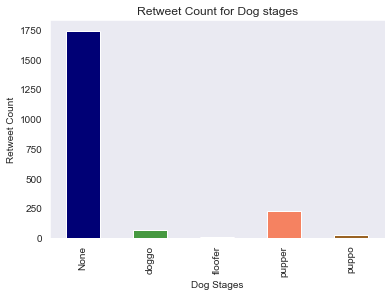

In [139]:
df_New.groupby('stage')['retweet_count'].agg('count').plot(kind='bar', color = ['#000075',  '#469940', '#911cb4','#f58261', '#9A6324'])
plt.title('Retweet Count for Dog stages')
plt.xlabel('Dog Stages')
plt.ylabel('Retweet Count')


Text(0, 0.5, 'favorite_count')

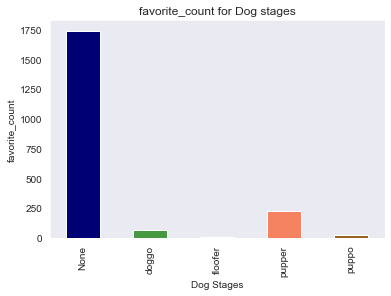

In [138]:
df_New.groupby('stage')['favorite_count'].agg('count').plot(kind='bar', color = ['#000075',  '#469940', '#911cb4','#f58261', '#9A6324'])
plt.title('favorite_count for Dog stages')
plt.xlabel('Dog Stages')
plt.ylabel('favorite_count')

In [ ]:
max
df_New.groupby('stage')['retweet_count'].agg('count').plot(kind='bar')

2.  Which dog stage recieved the highest rating?

In [119]:
#Most Ratings
df_New.groupby('stage')['rating_numerator'].agg('count')

stage
None       1739
doggo        65
floofer       8
pupper      221
puppo        24
Name: rating_numerator, dtype: int64

Text(0, 0.5, 'No of times rated')

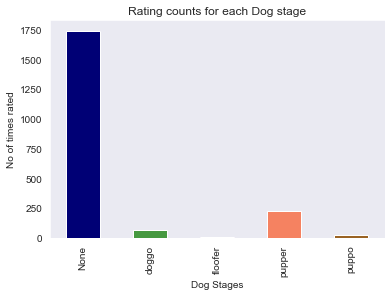

In [137]:
df_New.groupby('stage')['rating_numerator'].agg('count').plot(kind='bar', color = ['#000075',  '#469940', '#911cb4','#f58261', '#9A6324'])
plt.title('Rating counts for each Dog stage')
plt.xlabel('Dog Stages')
plt.ylabel('No of times rated')

In [125]:
#Highest ratings for each dog stage
df_New.groupby('stage')['rating_numerator'].agg('max')

stage
None       1776
doggo        14
floofer      13
pupper       27
puppo        14
Name: rating_numerator, dtype: int64

Text(0, 0.5, 'Max Rating')

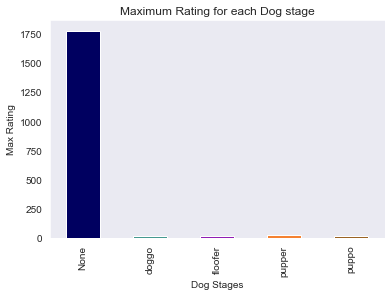

In [132]:
df_New.groupby('stage')['rating_numerator'].agg('max').plot(kind='bar', color = ['#000060',  '#469990', '#911eb4','#f58231', '#9A6324'])
plt.title('Maximum Rating for each Dog stage')
plt.xlabel('Dog Stages')
plt.ylabel('Max Rating')

3. What is the correlation between retweet count and favorites count

In [128]:
df_New[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.00000,0.86102
favorite_count,0.86102,1.00000


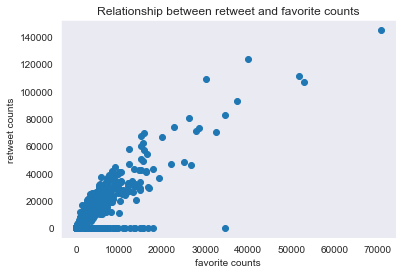

In [144]:
x, y  = df_New.retweet_count, df_New.favorite_count
 
plt.scatter(x,y)
plt.title("Relationship between retweet and favorite counts")
plt.xlabel("favorite counts")
plt.ylabel("retweet counts")
sns.set_style('dark')
plt.show()

Conclusions:
1.  People seem to generally like the dogs in the 'pupper' stage more as they recieved more likes and retweets
2.  Again, the pupper stage dogs recieved more ratings reaffirming the theory that people liked that stage more
3.  There exists a strong positive correlation (0.86) between the number of likes of each dog stage and their retweets